In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO"]

# Set timeframe to '1Day'
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
TSLA = prices_df[prices_df['symbol']=='TSLA'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([TSLA, KO], axis=1, keys=["TSLA", "KO"])

# Display sample data
prices_df.head()
prices_df.tail()

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2020-04-27 04:00:00+00:00  737.61  799.4900  735.00  798.75  20681442   
2020-04-28 04:00:00+00:00  795.30  805.0000  756.69  769.12  15222719   
2020-04-29 04:00:00+00:00  791.68  803.1999  783.16  800.51  16223632   
2020-04-30 04:00:00+00:00  855.00  869.8200  763.50  781.88  28477961   
2020-05-01 04:00:00+00:00  755.00  772.7700  683.04  701.32  32544885   

                                                      KO                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-04-27 04:00:00+00:00      433976  783.972936  46.00  46.975  45.71   
2020-04-28 04:00:00+00:00      313311  776.861887  47.90  48.000  46.57   
2020-04-29 04:00:00+00:00      369255  806.504911  47.20  47.860  46.88   
2020-04-30 04:00:00+00:00      615142  814.171635  46.80  47.000  45.70   
2020-05-01 04:00:00+00:00      728694  719.397692  45.62  46.390  45.21   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2020-04-27 04:00:00+00:00  46.78  19175988      124751  46.501892  
2020-04-28 04:00:00+00:00  46.74  17246696      119237  47.136381  
2020-04-29 04:00:00+00:00  47.12  15780082      112219  47.381483  
2020-04-30 04:00:00+00:00  45.89  20801092      142157  46.036240  
2020-05-01 04:00:00+00:00  45.60  14290418      104457  45.640609

In [5]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["KO"] = prices_df["KO"]["close"]
closing_prices_df["TSLA"] = prices_df["TSLA"]["close"]

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986


,KO,TSLA
2020-04-27,0.029716,0.101496
2020-04-28,-0.000855,-0.037095
2020-04-29,0.008130,0.040813
2020-04-30,-0.026104,-0.023273
2020-05-01,-0.006319,-0.103034


In [6]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns_df.describe()


,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


<AxesSubplot:title={'center':'KO Probability Distribution'}, ylabel='Frequency'>

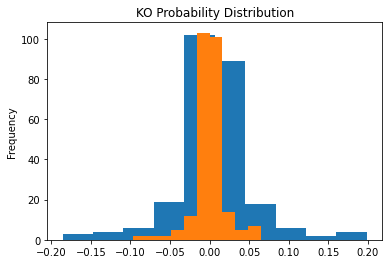

In [8]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df["TSLA"].plot.hist(title='TSLA Probability Distribution')

# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df["KO"].plot.hist(title='KO Probability Distribution')

<AxesSubplot:title={'center':'Density Plot for KO & TSLA'}, ylabel='Density'>

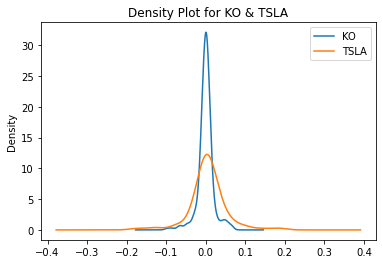

In [9]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns_df.plot.density(title='Density Plot for KO & TSLA')